# Handout 2. The R Environment

## 1.	Session Management
### 1.1 The workplace

All variables created in R are stored in a common workspace. To see which variables are defined in the workspace, you can use the function `ls (list)`. you can delete some of the objects and this is done using `rm (remove)`.

In [ ]:
# Continue the example from lecture 1
height <- c(1.75, 1.80, 1.65, 1.90, 1.74, 1.91)
weight <- c(60, 72, 57, 90, 95, 72)
bmi <- weight/height^2

ls()

In [ ]:
rm(height, weight)
ls()

In [ ]:
rm(list=ls())

In [ ]:
save.image()  ## save the workplace to a file called “.RData”

## 1.2 Textual output

It is important to note that the workspace consists only of R objects, not of any of the output that you have generated during a session. If you want to save your output, use “Save to File” from the File menu in Windows or use standard cut-and-paste facilities.

An alternative way of diverting output to a file is to use the `sink` function.

In [ ]:
sink("myfile")
ls()
sink()

The current working directory can be obtained by `getwd()`...

In [ ]:
getwd()

and changed by `setwd(mydir)`, where `mydir` is a character string.

In [ ]:
setwd('/home/datacomputing')
getwd()

In [ ]:
setwd('/home/datacomputing/shared')

### 1.3 Scripting
Beyond a certain level of complexity, you will not want to work with R on a line-by-line basis. In such cases, it is better to work with R scripts, collections of lines of R code stored either in a file.

You could use the `source` function, which takes the input (i.e., the commands from a file) and runs them.

### 1.4 Getting help

In [ ]:
help(source)

In [ ]:
help.search("kendal")

In [ ]:
??kendal

### 1.5 Packages
An R installation contains one or more libraries of packages. Some of these packages are part of the basic installation. Others can be downloaded from CRAN, which currently hosts over 1000 packages for various purposes. You can even create your own packages. 

A package is loaded into R using the `library` command. For example, to load the `survival` package you should enter:

In [ ]:
library(survival)

### 1.6 Built-in data

Many packages, both inside and outside the standard R distribution, come with built-in data sets. Such data sets can be rather large, so it is not a good idea to keep them all in computer memory at all times.

**Note:** On your system, you may need to install the package ISwR using the command 
```
install.packages('ISwR')
```

In [ ]:
library( package = ISwR )
data(thuesen)

### 1.7 Subset and transform functions

In [1]:
thue2 <- subset(thuesen,blood.glucose<7)
thue2

ERROR: Error in subset(thuesen, blood.glucose < 7): object 'thuesen' not found


In [2]:
thue3 <- transform(thuesen,log.gluc=log(blood.glucose))

ERROR: Error in transform(thuesen, log.gluc = log(blood.glucose)): object 'thuesen' not found


In [3]:
thue3

ERROR: Error in eval(expr, envir, enclos): object 'thue3' not found


## 2.	The graphics subsystem
### 2.1 Plot layout
A standard x–y plot has an $x$ and a $y$ title label generated from the expressions being plotted.
```
x <- runif(50,0,2)
y <- runif(50,0,2)
plot(x, y, main="Main title", sub="subtitle", xlab="x-label", ylab="y-label")
```

Inside the plotting region, you can place points and lines that are either specified in the plot call or added later with points and lines. You can also place a text with

```
text(0.6,0.6,"text at (0.6,0.6)")
abline(h=.6, v=.6)
```

The margin coordinates are used by the `mtext` function. They can be demonstrated as follows:
```
for (side in 1:4) mtext(-1:4,side=side,at=.7,line=-1:4)
mtext(paste("side",1:4), side=1:4, line=-1,font=2)
```

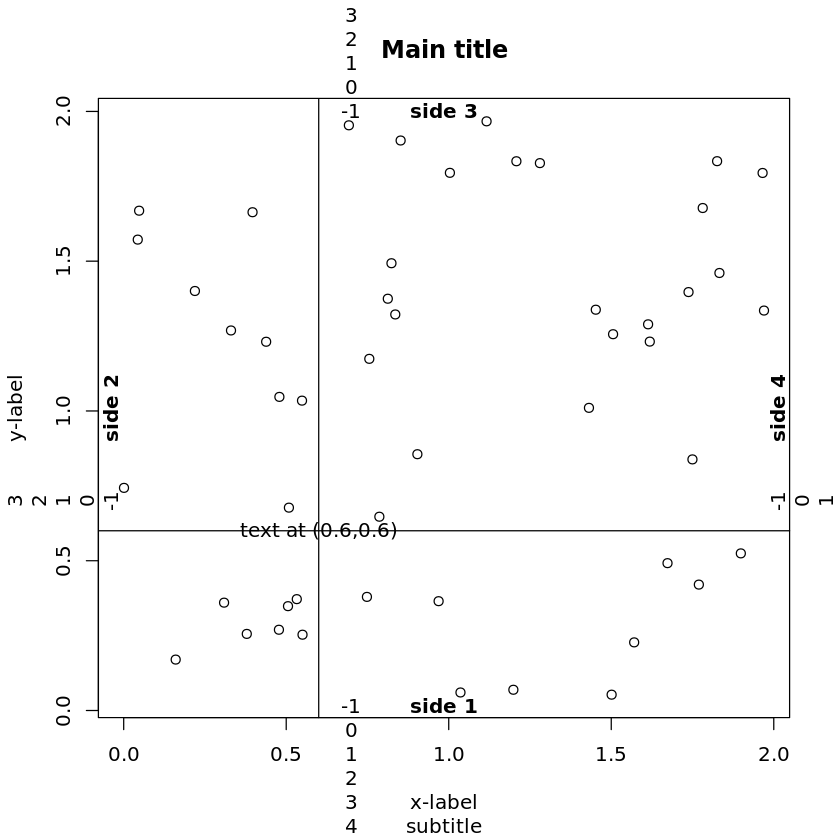

In [4]:
x <- runif(50,0,2)
y <- runif(50,0,2)
plot(x, y, main="Main title", sub="subtitle", xlab="x-label", ylab="y-label")

text(0.6,0.6,"text at (0.6,0.6)")
abline(h=.6, v=.6)

# Continue from above example
for (side in 1:4) mtext(-1:4,side=side,at=.7,line=-1:4)
mtext(paste("side",1:4), side=1:4, line=-1,font=2)

### 2.2 Building a plot from pieces
High-level plots are composed of elements, each of which can also be drawn separately.

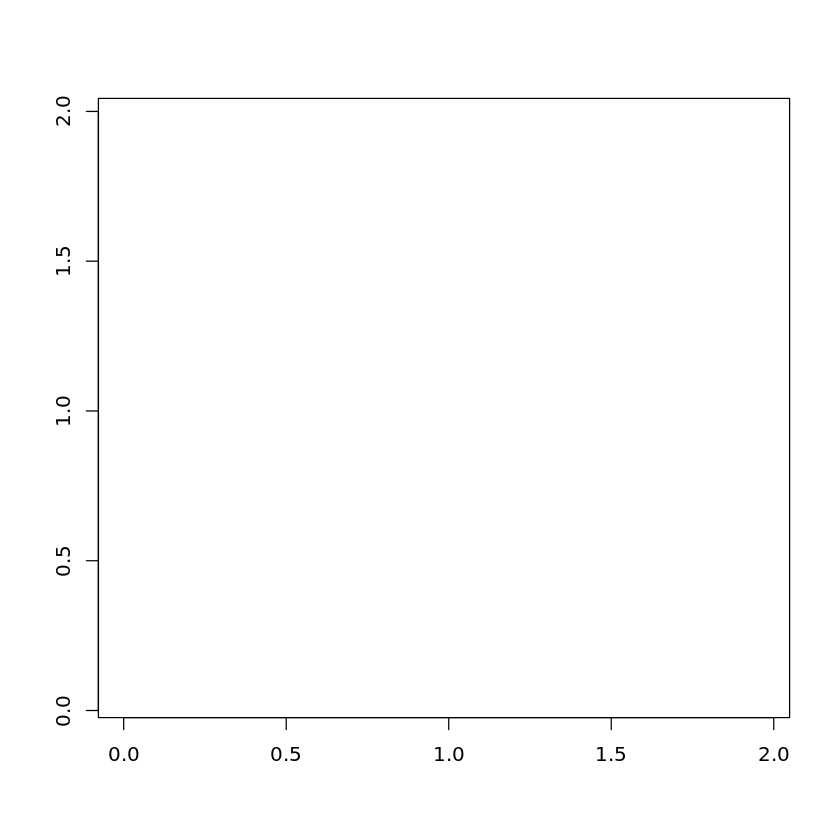

In [5]:
plot(x, y, type="n", xlab="", ylab="")

To add the plot elements, evaluate the following:

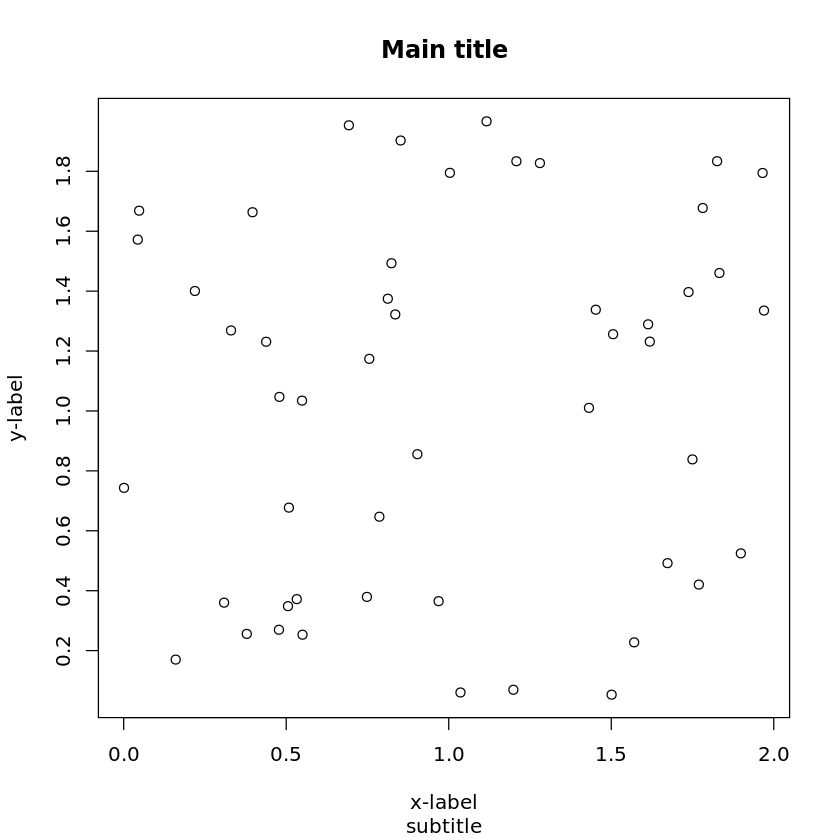

In [6]:
plot(x, y, type="n", xlab="", ylab="", axes=F)
points(x,y)
axis(1)
axis(2,at=seq(0.2,1.8,0.2))
box()
title(main="Main title", sub="subtitle", xlab="x-label", ylab="y-label")

### 2.3 Combining plots
Consider overlaying a histogram with a normal density

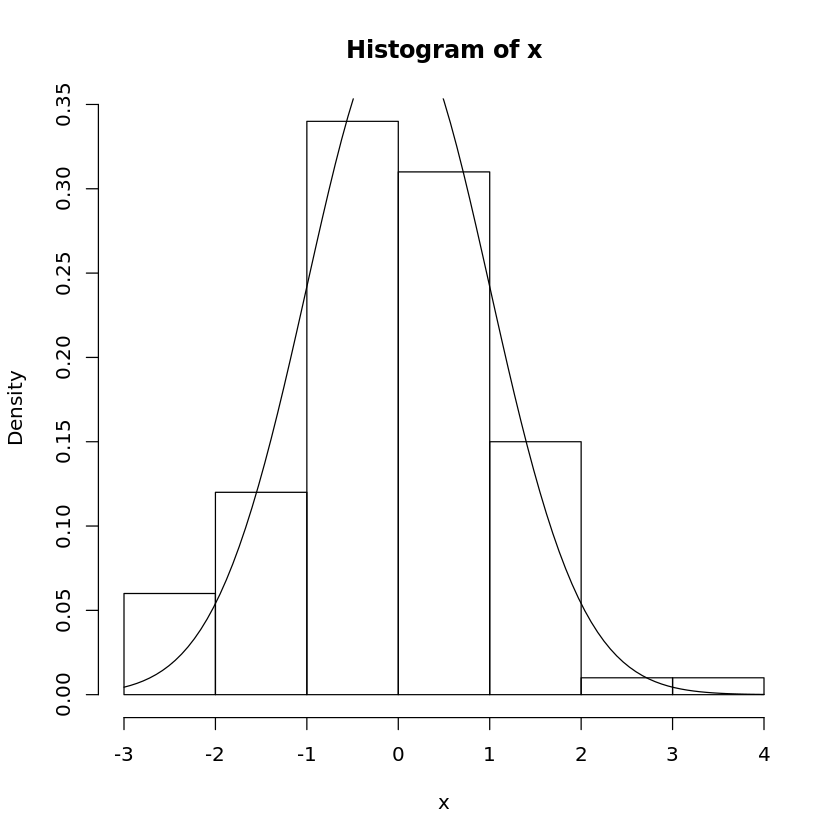

In [7]:
x <- rnorm(100)
hist(x,freq=F)
curve(dnorm(x),add=T)

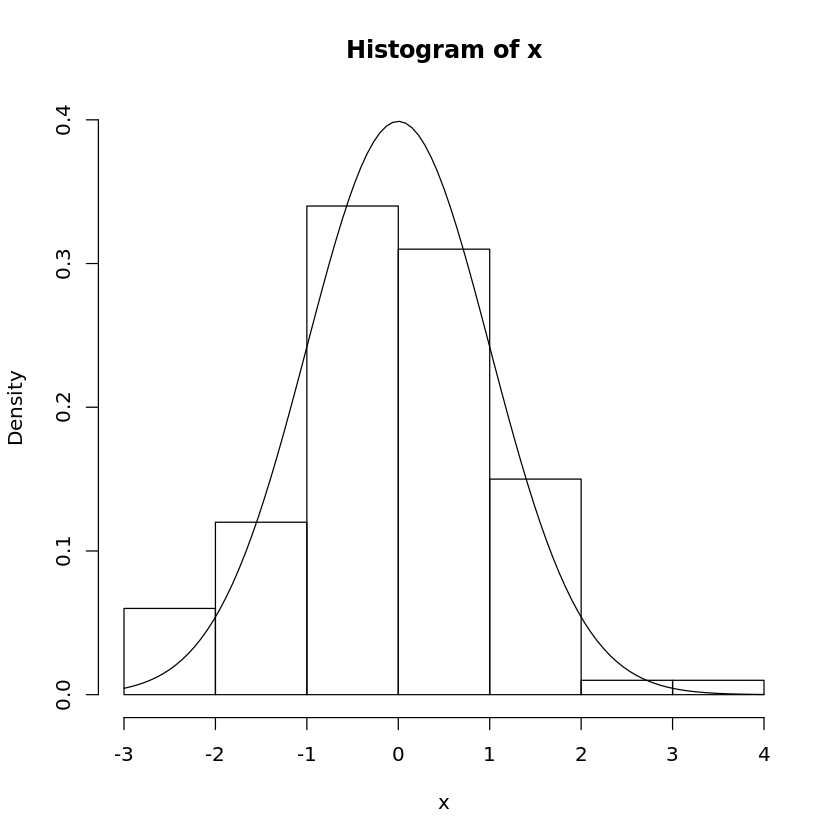

In [8]:
h <- hist(x, plot=F)
ylim <- range(0, h$density, dnorm(0))
hist(x, freq=F, ylim=ylim)
curve(dnorm(x), add=T)

### 3.	R programming
It is possible to write your own R functions.

In [9]:
hist.with.normal <- function(x, 
xlab=deparse(substitute(x)),...){
  h <- hist(x, plot=F, ...)
  s <- sd(x)
  m <- mean(x)
  ylim <- range(0,h$density,dnorm(0,sd=s))
  hist(x, freq=F, ylim=ylim, xlab=xlab, ...)
  curve(dnorm(x,m,s), add=T)
 }

### 3.1 Flow control
Consider the following code that implements a version of Newton’s method for calculating the square root of y.

(1)	**while (condition) expression** construction.

In [10]:
y <- 12345
x <- y/2
while (abs(x*x-y) > 1e-10) x <- (x + y/x)/2
x

[1] 111.1081

In [11]:
x^2

[1] 12345

(2) **repeat** construction

In [12]:
x <- y/2
repeat {
  x <- (x + y/x)/2
  if (abs(x*x-y) < 1e-10) break
}
x  

[1] 111.1081

(3) **for** loop 

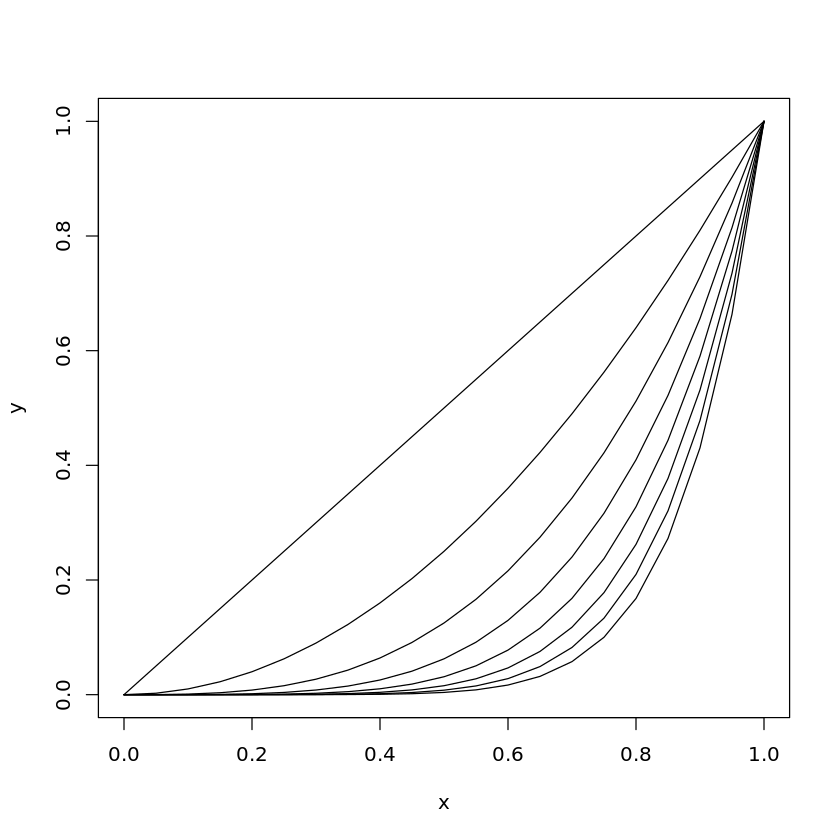

In [13]:
x <- seq(0, 1,.05)
plot(x, x, ylab="y", type="l")
for ( j in 2:8 ) lines(x, x^j)

### 3.2 Classes and generic functions
Object-oriented programming is about creating coherent systems of data and methods that work upon them. A prototype example is the print method: It makes sense to print many kinds of data objects, but the print layout will depend on what the data object is.

In [14]:
t.test(bmi, mu=22.5)$p.value

ERROR: Error in t.test(bmi, mu = 22.5): object 'bmi' not found


## 4.	Reading data from a file
The most convenient way of reading data into R is via the function called `read.table`. 

Date,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL
1/3/1994,0.048913361,0.135255005,-0.022895763,0.062310900,-0.012589127,0.089235820,-0.004332150,0.000000000,0.023481096,0.049108780
2/1/1994,0.048848568,-0.014934233,-0.009507324,0.020684599,0.059585690,-0.002166062,-0.014385591,-0.026849988,-0.013542573,0.010790480
3/1/1994,-0.040760913,-0.078928087,0.000872954,0.162272565,0.000000000,-0.071433468,-0.007948095,0.014168956,0.011633584,-0.010790480
4/4/1994,-0.044394486,0.041944521,0.002174739,-0.073436234,-0.059585690,-0.117886057,0.002285766,0.022294267,0.038425824,-0.031135409
5/2/1994,-0.009571616,0.031889144,0.015763276,0.010088973,0.121733597,-0.018288786,0.003406249,0.041423553,0.064940807,0.057624989
6/1/1994,-0.042543456,-0.022343827,-0.000837598,-0.033423755,-0.040428657,-0.126498144,0.006733383,-0.030360262,-0.016912719,0.039285024
7/1/1994,0.103924521,0.056810193,-0.013626043,0.033423755,0.030668820,0.100023248,0.021719250,0.022574208,-0.001570687,0.009290076
8/1/1994,0.032859345,0.009365203,0.021518747,0.031034234,0.064117500,0.022958322,-0.017287635,0.045883173,0.053245512,0.047820651
9/1/1994,-0.031286762,0.011429462,0.018140226,0.011234929,0.055857817,0.101359551,0.025680060,0.007011687,-0.015588098,0.002053406
10/3/1994,0.107863536,0.044967146,0.015892959,-0.052358136,0.081670046,0.099511699,0.045341699,0.029313568,0.050350205,0.029689996


[1] 156  11

[1] "Date" "AAPL" "ADBE" "ADP"  "AMD"  "DELL" "GTW"  "HP"   "IBM"  "MSFT"
[11] "ORCL"

Date,ADBE,AMD,DELL,GTW,HP,IBM,MSFT,ORCL
1/3/1994,0.135255005,0.06231090,-0.01258913,0.089235820,-0.004332150,0.000000000,0.023481096,0.049108780
2/1/1994,-0.014934233,0.02068460,0.05958569,-0.002166062,-0.014385591,-0.026849988,-0.013542573,0.010790480
3/1/1994,-0.078928087,0.16227257,0.00000000,-0.071433468,-0.007948095,0.014168956,0.011633584,-0.010790480
4/4/1994,0.041944521,-0.07343623,-0.05958569,-0.117886057,0.002285766,0.022294267,0.038425824,-0.031135409
5/2/1994,0.031889144,0.01008897,0.12173360,-0.018288786,0.003406249,0.041423553,0.064940807,0.057624989
6/1/1994,-0.022343827,-0.03342375,-0.04042866,-0.126498144,0.006733383,-0.030360262,-0.016912719,0.039285024
7/1/1994,0.056810193,0.03342375,0.03066882,0.100023248,0.021719250,0.022574208,-0.001570687,0.009290076
8/1/1994,0.009365203,0.03103423,0.06411750,0.022958322,-0.017287635,0.045883173,0.053245512,0.047820651
9/1/1994,0.011429462,0.01123493,0.05585782,0.101359551,0.025680060,0.007011687,-0.015588098,0.002053406
10/3/1994,0.044967146,-0.05235814,0.08167005,0.099511699,0.045341699,0.029313568,0.050350205,0.029689996


[1] "1/2/1996"  "1/2/1997"  "1/2/1998"  "1/2/2001"  "1/2/2002"  "1/2/2003" 
  [7] "1/2/2004"  "1/3/1994"  "1/3/1995"  "1/3/2000"  "1/3/2005"  "1/3/2006" 
 [13] "1/4/1999"  "10/1/1996" "10/1/1997" "10/1/1998" "10/1/1999" "10/1/2001"
 [19] "10/1/2002" "10/1/2003" "10/1/2004" "10/2/1995" "10/2/2000" "10/2/2006"
 [25] "10/3/1994" "10/3/2005" "11/1/1994" "11/1/1995" "11/1/1996" "11/1/1999"
 [31] "11/1/2000" "11/1/2001" "11/1/2002" "11/1/2004" "11/1/2005" "11/1/2006"
 [37] "11/2/1998" "11/3/1997" "11/3/2003" "12/1/1994" "12/1/1995" "12/1/1997"
 [43] "12/1/1998" "12/1/1999" "12/1/2000" "12/1/2003" "12/1/2004" "12/1/2005"
 [49] "12/1/2006" "12/2/1996" "12/2/2002" "12/3/2001" "2/1/1994"  "2/1/1995" 
 [55] "2/1/1996"  "2/1/1999"  "2/1/2000"  "2/1/2001"  "2/1/2002"  "2/1/2005" 
 [61] "2/1/2006"  "2/2/1998"  "2/2/2004"  "2/3/1997"  "2/3/2003"  "3/1/1994" 
 [67] "3/1/1995"  "3/1/1996"  "3/1/1999"  "3/1/2000"  "3/1/2001"  "3/1/2002" 
 [73] "3/1/2004"  "3/1/2005"  "3/1/2006"  "3/2/1998"  "3/3/1997"  "3/3/2003" 
 [79] "4/1/1996"  "4/1/1997"  "4/1/1998"  "4/1/1999"  "4/1/2002"  "4/1/2003" 
 [85] "4/1/2004"  "4/1/2005"  "4/2/2001"  "4/3/1995"  "4/3/2000"  "4/3/2006" 
 [91] "4/4/1994"  "5/1/1995"  "5/1/1996"  "5/1/1997"  "5/1/1998"  "5/1/2000" 
 [97] "5/1/2001"  "5/1/2002"  "5/1/2003"  "5/1/2006"  "5/2/1994"  "5/2/2005" 
[103] "5/3/1999"  "5/3/2004"  "6/1/1994"  "6/1/1995"  "6/1/1998"  "6/1/1999" 
[109] "6/1/2000"  "6/1/2001"  "6/1/2004"  "6/1/2005"  "6/1/2006"  "6/2/1997" 
[115] "6/2/2003"  "6/3/1996"  "6/3/2002"  "7/1/1994"  "7/1/1996"  "7/1/1997" 
[121] "7/1/1998"  "7/1/1999"  "7/1/2002"  "7/1/2003"  "7/1/2004"  "7/1/2005" 
[127] "7/2/2001"  "7/3/1995"  "7/3/2000"  "7/3/2006"  "8/1/1994"  "8/1/1995" 
[133] "8/1/1996"  "8/1/1997"  "8/1/2000"  "8/1/2001"  "8/1/2002"  "8/1/2003" 
[139] "8/1/2005"  "8/1/2006"  "8/2/1999"  "8/2/2004"  "8/3/1998"  "9/1/1994" 
[145] "9/1/1995"  "9/1/1998"  "9/1/1999"  "9/1/2000"  "9/1/2004"  "9/1/2005" 
[151] "9/1/2006"  "9/2/1997"  "9/2/2003"  "9/3/1996"  "9/3/2002"  "9/4/2001"

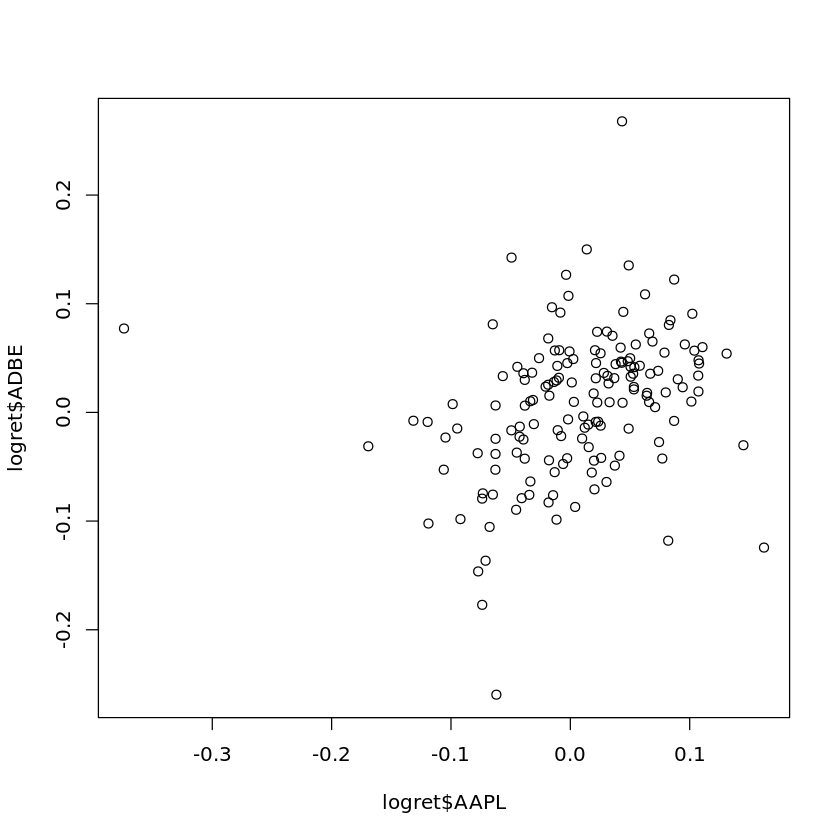

In [15]:
logret<-read.table("http://www.ams.sunysb.edu/~songwu/AMS561/m_logret_10stocks.txt", header=T)
logret
dim(logret)
names(logret)
logret[1:10,-c(2,4)]
levels(logret$Date)
subset.1<-logret[logret[,2]>0.01,seq(1,5)]
plot(logret$AAPL, logret$ADBE)